In [1]:
import pyattimo
import matplotlib.pyplot as plt

First, we download the ECG dataset, and load the first 100k points

In [2]:
ts = pyattimo.load_dataset("ecg", 100000)

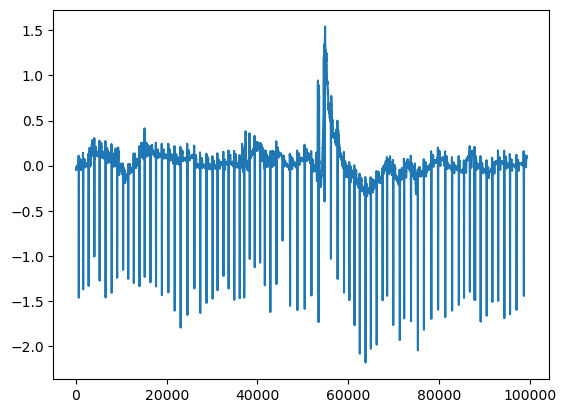

In [3]:
plt.plot(ts)

Then, we can find the motiflets of length 1000 for which there are 4 instances.

In [4]:
m = pyattimo.motiflet(ts, w=1000, support=4)

Computed hash values in 250.141026ms
next distance 1.6161695386278412
motiflets state: nearest neighbor entries: 2596 max neighbors: 4


We can plot it

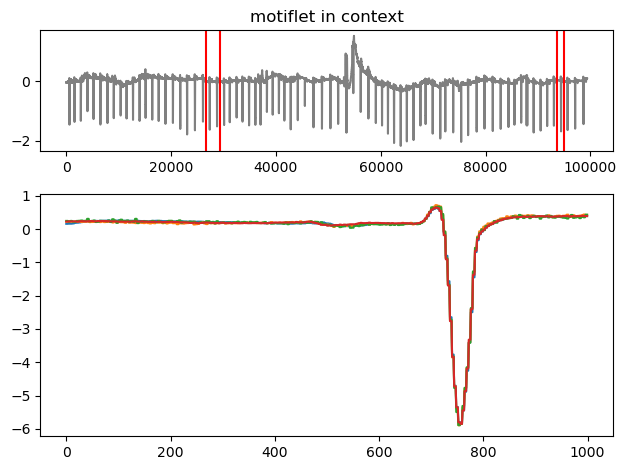

In [5]:
m.plot()

And we can inspect the indices of the sequences, including its extent

In [6]:
print(m)
print(m.extent)
print(m.indices)

motiflet: [94908, 26624, 29360, 93656] extent=1.4422938182235412
1.4422938182235412
[94908, 26624, 29360, 93656]
